# **Detecting AI-Generated Text using Transformer Models**

This project explores the use of **BERT (Bidirectional Encoder Representations from Transformers)** — a state-of-the-art transformer-based deep learning model — to classify whether a given piece of text was written by a human or generated by AI. In an era where AI-generated content is becoming increasingly common, building reliable detection models is essential for preserving academic integrity and content authenticity.

**BERT**

BERT (Bidirectional Encoder Representations from Transformers) leverages a transformer-based neural network to understand and generate human-like language. BERT employs an encoder-only architecture. In the original Transformer architecture, there are both encoder and decoder modules. The decision to use an encoder-only architecture in BERT suggests a primary emphasis on understanding input sequences rather than generating output sequences.

**Introduction**

AI-generated content is becoming increasingly sophisticated, making it challenging to distinguish between genuine and computer-generated text. Our project aims to tackle this issue by leveraging the power of BERT (Bidirectional Encoder Representations from Transformers) to identify and flag AI-generated text segments. Whether you're dealing with chatbots, articles, or social media posts, our solution offers accurate detection, ensuring the authenticity of digital content.

**Features**

*BERT-Powered Detection:* We utilize state-of-the-art BERT models to analyze the semantic context and linguistic nuances, enabling precise identification of AI-generated text.

*High Accuracy:* Our model is meticulously trained and fine-tuned to achieve high accuracy, minimizing false positives and false negatives for reliable results.

**How It Works**
Our solution follows a comprehensive approach to AI-generated text detection:

*Data Preprocessing:* We clean and preprocess the textual data, removing noise and irrelevant information to enhance the accuracy of our model.

*BERT Tokenization: *Leveraging the BERT tokenizer, we encode the preprocessed text, preparing it for input into our detection model.

*Model Training:* Using a BERT-based sequence classification model, we train the system to distinguish between genuine and AI-generated text with a high degree of accuracy.

*Predictions:* Once trained, the model generates predictions for test data, highlighting potential AI-generated content segments.

*Result Analysis:* The results are saved in a CSV file, allowing users to review and analyze the detected segments along with their confidence scores.

Bert-
Uses Self Attention which weighs the importanc each each word-Uses Transformers
bidirectional processing-  instead of just left-right   both the prev and next word is considered  Threfore, better context is achieved

BERT is pre-trained with Masked Language Modeling (MLM) and Next Sentence Prediction (NSP). It is trained on a large corpus


It take 3 inputs- token embedding, segment embedding(where the token belongs in a sentence paur), and positional embeddings

In [ ]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification
# Import AdamW from torch.optim instead of transformers.optimization
from torch.optim import AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

'Copy of Meghana and Mounika- llm-detect-ai-generated-text.ipynb'  'Testing dataset (1).gsheet'
 final_test.csv							   'Testing dataset (2).gsheet'
'Meghana and Mounika- llm-detect-ai-generated-text.ipynb'	   'Testing dataset.csv'
'Mixed Dataset 1.csv'						   'Testing dataset.gsheet'
'Mixed dataset.csv'						   'Training_Essay_Data (1).gsheet'
'Mixed dataset.gsheet'						    Training_Essay_Data.csv
 submission.csv							    Training_Essay_Data.gsheet
 submission.gsheet						    Untitled
'Testing Data 1.csv'						    Untitled0.ipynb


In [ ]:
# Load the training and testing datasets
train_essays = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mixed Dataset 1.csv")
test_essays = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Testing Data 1.csv")

In [ ]:
print(train_essays.head())

                                                text  generated
0  Cars. Cars have been around since they became ...          0
1  Transportation is a large necessity in most co...          0
2  "America's love affair with it's vehicles seem...          0
3  How often do you ride in a car? Do you drive a...          0
4  Cars are a wonderful thing. They are perhaps o...          0


In [ ]:
print(test_essays.head())

                                                text  label
0  Phones and Driving\n\nEveryday people die beca...      0
1  Phones & Driving\n\nTeens, adults, and even of...      0
2  Phones and Driving\n\nEach year phones are get...      0
3  cellphones and driving\n\nCellphones and drivi...      0
4  Texting and Driving\n\nThousands of people die...      0


In [ ]:
# Explore the training data
train_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       4022 non-null   object
 1   generated  4022 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.0+ KB


In [ ]:
train_essays.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [ ]:
test_essays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4100 non-null   object
 1   label   4100 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 64.2+ KB


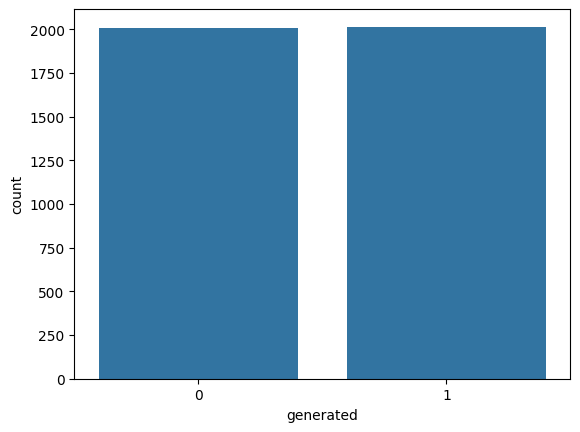

In [ ]:
# Check for class balance
sns.countplot(data=train_essays, x='generated')
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Text Preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    words = text.split()  # Tokenize
    words = [word.lower() for word in words if word.isalpha()]  # Lowercase and remove non-alphabetic words
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

train_essays['clean_text'] = train_essays['text'].apply(clean_text)

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_essays['clean_text'], train_essays['generated'], test_size=0.2, random_state=42)


In [ ]:
# Tokenization and Encoding for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, padding=True, truncation=True, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
encoded_train = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='pt')
encoded_val = tokenizer(X_val.tolist(), padding=True, truncation=True, return_tensors='pt')
# Here, converting dataset using bert tokenizer into pytorch tensors.
# pytorch is used because i need it to run on gpu, and we have heavy matrix computations

In [ ]:
# Convert labels to tensors
train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_val.values)


In [ ]:
# Create TensorDatasets
train_dataset = TensorDataset(encoded_train['input_ids'], encoded_train['attention_mask'], train_labels)
val_dataset = TensorDataset(encoded_val['input_ids'], encoded_val['attention_mask'], val_labels)


In [ ]:
# DataLoader for efficient processing
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [ ]:
# Define the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)# 2 classes to classify
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# Define optimizer and learning rate scheduler
#adam weight optimizer to update model weight during learning
#prevent over fitting uses l2 regularization
# optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
# epochs = 10
optimizer = AdamW(model.parameters(), lr=2e-5) # Remove correct_bias argument
epochs = 6

In [ ]:
# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:#iterates over mini batches
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        #forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        #backpropagation
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping to avoid exploding gradients
        optimizer.step()#update weights
    #loss tracking
    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{epochs}, Average Training Loss: {avg_train_loss:.2f}")


Epoch 1/10, Average Training Loss: 0.13
Epoch 2/10, Average Training Loss: 0.03
Epoch 3/10, Average Training Loss: 0.02
Epoch 4/10, Average Training Loss: 0.00
Epoch 5/10, Average Training Loss: 0.01
Epoch 6/10, Average Training Loss: 0.01
Epoch 7/10, Average Training Loss: 0.00
Epoch 8/10, Average Training Loss: 0.00
Epoch 9/10, Average Training Loss: 0.00
Epoch 10/10, Average Training Loss: 0.00


In [ ]:
# Validation loop
#evaluates bert performance without updating weights
#no backpropagation
#checks if correct classification
model.eval()
val_preds = []
val_labels = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
        val_labels.extend(labels.cpu().numpy())


In [ ]:
# Calculate validation accuracy
val_accuracy = accuracy_score(val_labels, val_preds)
print(f"Validation Accuracy: {val_accuracy:.2f}")

NameError: name 'accuracy_score' is not defined

In [ ]:
# # Test data processing

# test_inputs = tokenizer(test_essays['text'].tolist(), padding=True, truncation=True, return_tensors='pt')

# # Move input tensor to the same device as the model
# test_inputs = {key: value.to(device) for key, value in test_inputs.items()}

# # Generating predictions using my trained model
# with torch.no_grad():
#     outputs = model(**test_inputs)
#     logits = outputs.logits


# predictions = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()  # Move predictions back to CPU

# # Create a submission DataFrame with essay IDs and corresponding predictions
# submission = pd.DataFrame({
#     'id': test_essays['label'],
#     'generated': predictions
# })
# print(submission.head())
# # Save the submission DataFrame to a CSV file
# submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission.csv', index=False)

# Test data processing

# Generate predictions in batches
batch_size = 16  # Adjust batch size as needed
predictions = []

for i in range(0, len(test_essays), batch_size):
    batch_texts = test_essays['text'][i:i + batch_size].tolist()
    test_inputs = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt')

    # Move input tensor to the same device as the model
    test_inputs = {key: value.to(device) for key, value in test_inputs.items()}

    with torch.no_grad():
        outputs = model(**test_inputs)
        logits = outputs.logits

    batch_predictions = torch.softmax(logits, dim=1)[:, 1].cpu().numpy()
    predictions.extend(batch_predictions)

# Create a submission DataFrame with essay IDs and corresponding predictions
submission = pd.DataFrame({
    'id': test_essays['label'],
    'generated': predictions
})
print(submission.head())
# Save the submission DataFrame to a CSV file
submission.to_csv('/content/drive/My Drive/Colab Notebooks/submission.csv', index=False)

   id  generated
0   0   0.004442
1   0   0.018828
2   0   0.000937
3   0   0.011298
4   0   0.000335


In [ ]:
print(submission)
#AI is 1
#Human is 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define y_true and y_pred
y_true = np.array(val_labels)  # All true labels are 1
y_pred = np.array(val_preds)  # All predictions are 1

# Compute confusion matrix with explicit labels
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # Include both classes

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Human', 'Human'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()


In [ ]:
pip install textstat


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


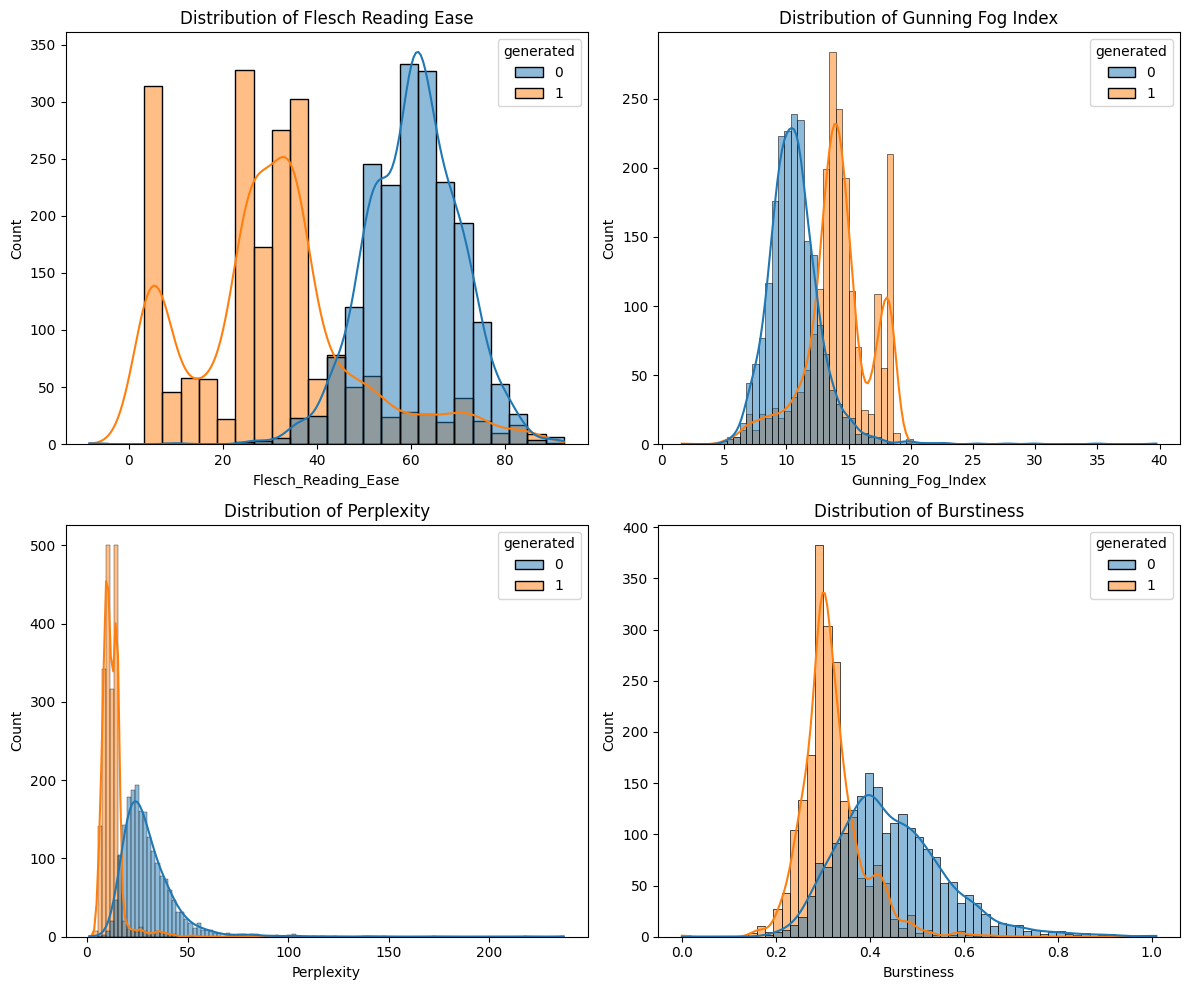

Average Flesch Reading Ease:
generated
0    60.605304
1    30.618679
Name: Flesch_Reading_Ease, dtype: float64

Average Gunning Fog Index:
generated
0    10.663795
1    14.146609
Name: Gunning_Fog_Index, dtype: float64

Average Perplexity:
generated
0    30.546270
1    12.407761
Name: Perplexity, dtype: float64

Average Burstiness:
generated
0    0.446804
1    0.318412
Name: Burstiness, dtype: float64



In [ ]:
!pip install textstat
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab') # This line was added to fix the error

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textstat import flesch_reading_ease, gunning_fog
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Download required NLTK resources


# Load dataset
#train_essays = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")

# Function to calculate Flesch Reading Ease Score
def calculate_flesch(text):
    return flesch_reading_ease(text)

# Function to calculate Gunning Fog Index
def calculate_gunning_fog(text):
    return gunning_fog(text)

# Function to compute perplexity using GPT-2
def calculate_perplexity(text, model, tokenizer, device):
    encodings = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    input_ids = encodings.input_ids.to(device)

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
        perplexity = torch.exp(loss)

    return perplexity.item()

# Load GPT-2 model and tokenizer for perplexity calculation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gpt2_model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)
gpt2_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Function to calculate Burstiness (Variance of sentence lengths)
def calculate_burstiness(text):
    sentences = sent_tokenize(text)
    sentence_lengths = [len(word_tokenize(sent)) for sent in sentences]

    if len(sentence_lengths) > 1:
        burstiness = np.std(sentence_lengths) / np.mean(sentence_lengths)
    else:
        burstiness = 0  # Default if only one sentence

    return burstiness

# Apply calculations to the dataset
train_essays['Flesch_Reading_Ease'] = train_essays['text'].apply(calculate_flesch)
train_essays['Gunning_Fog_Index'] = train_essays['text'].apply(calculate_gunning_fog)
train_essays['Perplexity'] = train_essays['text'].apply(lambda x: calculate_perplexity(x, gpt2_model, gpt2_tokenizer, device))
train_essays['Burstiness'] = train_essays['text'].apply(calculate_burstiness)

# Compute averages
average_flesch = train_essays.groupby("generated")["Flesch_Reading_Ease"].mean()
average_gunning_fog = train_essays.groupby("generated")["Gunning_Fog_Index"].mean()
average_perplexity = train_essays.groupby("generated")["Perplexity"].mean()
average_burstiness = train_essays.groupby("generated")["Burstiness"].mean()

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flesch Reading Ease
sns.histplot(data=train_essays, x="Flesch_Reading_Ease", hue="generated", kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Flesch Reading Ease")

# Gunning Fog Index
sns.histplot(data=train_essays, x="Gunning_Fog_Index", hue="generated", kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Gunning Fog Index")

# Perplexity
sns.histplot(data=train_essays, x="Perplexity", hue="generated", kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Perplexity")

# Burstiness
sns.histplot(data=train_essays, x="Burstiness", hue="generated", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Burstiness")

plt.tight_layout()
plt.show()

# Print average values
print(f"Average Flesch Reading Ease:\n{average_flesch}\n")
print(f"Average Gunning Fog Index:\n{average_gunning_fog}\n")
print(f"Average Perplexity:\n{average_perplexity}\n")
print(f"Average Burstiness:\n{average_burstiness}\n")

**Flesh score-** high score- easy to read text

Ai text has low score and is therefore hard to read

human generated text is easier to read

**Gunning fox index-**complexity based on word length and sentence structure

high values- - more difficult to read

AI has high values compared to human text

**Perplexity-** how suprised is a model while predicting a language

lower perplexity- text follows expected pattern

AI has lower and Human has Higher

**Burstiness.** Variation in sentence length and structure

high-varied writing style

ai less bursty-0.3 to 0.6

HUman has more than 0.6, therefore varied

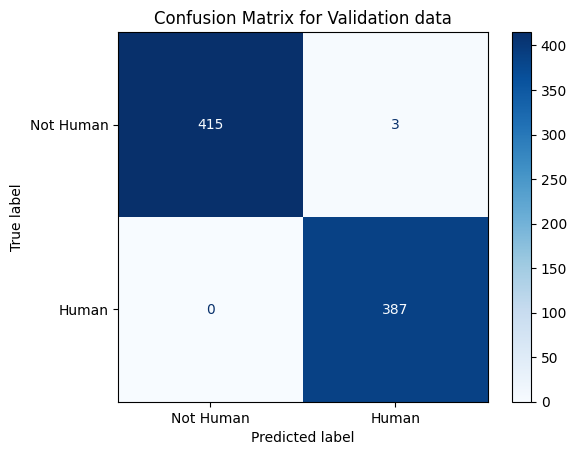

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define y_true and y_pred
y_true = np.array(val_labels)  # All true labels are 1
y_pred = np.array(val_preds)  # All predictions are 1

# Compute confusion matrix with explicit labels
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # Include both classes

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Human', 'Human'])
disp.plot(cmap='Blues')

plt.title("Confusion Matrix for Validation data")
plt.show()


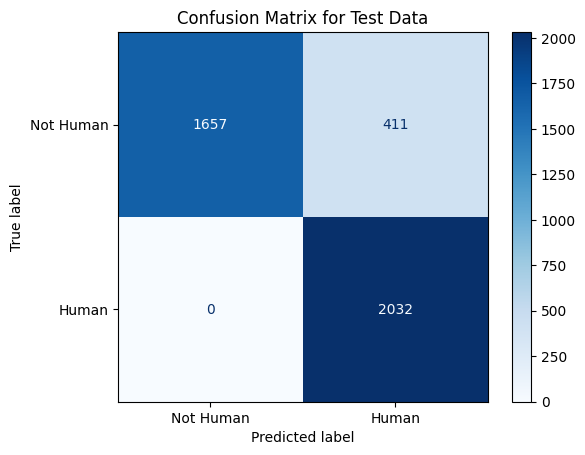

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (Your existing code for predictions) ...


# Get actual labels for test data
y_true_test = test_essays['label'].values

# Convert predictions to binary (0 or 1) using a threshold (e.g., 0.5)
predictions_binary = (np.array(predictions) >= 0.5).astype(int) #converts probabilities to 0 or 1

# Create confusion matrix for test data using binary predictions
cm_test = confusion_matrix(y_true_test, predictions_binary, labels=[0, 1])

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Not Human', 'Human'])
disp_test.plot(cmap='Blues')

plt.title("Confusion Matrix for Test Data")
plt.show()

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
def tokenize_function(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')

X_train_tokens = tokenize_function(X_train)
X_test_tokens = tokenize_function(X_test)

# Define model
model = AutoModelForSequenceClassification.from_pretrained("distilgpt2", num_labels=2)

# Define trainer
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=list(zip(X_train_tokens['input_ids'], y_train)),
    eval_dataset=list(zip(X_test_tokens['input_ids'], y_test))
)

# Train model
trainer.train()

# Evaluate model
y_pred = trainer.predict(list(zip(X_test_tokens['input_ids'], y_test))).predictions.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Generative Transformers')
plt.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

NameError: name 'X_train' is not defined